<a href="https://colab.research.google.com/github/amien1410/kaggle-projects/blob/main/Amazon_Books_Reviews_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Install Kaggle modules and download the dataset
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'
!kaggle datasets download -d mohamedbakhet/amazon-books-reviews
!unzip -q "/content/amazon-books-reviews.zip"

In [3]:
# Install modules
!pip install  missingno
!pip install wordcloud

In [4]:
# Load modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from IPython.core.display import display, HTML
from skimage import io
import missingno as msno
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO

In [5]:
# Load books dataset into dataframe
df_books=pd.read_csv('/content/books_data.csv')
df_books

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
212399,The Orphan Of Ellis Island (Time Travel Advent...,"During a school trip to Ellis Island, Dominick...",['Elvira Woodruff'],http://books.google.com/books/content?id=J7M-N...,http://books.google.com/books?id=J7M-NwAACAAJ&...,Scholastic Paperbacks,2000-06-01,http://books.google.com/books?id=J7M-NwAACAAJ&...,['Juvenile Fiction'],2.0
212400,Red Boots for Christmas,Everyone in the village of Friedensdorf is hap...,NaN,http://books.google.com/books/content?id=3n8k6...,http://books.google.com/books?id=3n8k6wl4BbYC&...,NaN,1995,http://books.google.com/books?id=3n8k6wl4BbYC&...,['Juvenile Fiction'],NaN
212401,Mamaw,"Give your Mamaw a useful, beautiful and though...",['Wild Wild Cabbage'],NaN,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,2018-01-17,http://books.google.com/books?id=zytVswEACAAJ&...,NaN,NaN
212402,The Autograph Man,Alex-Li Tandem sells autographs. His business ...,['Zadie Smith'],http://books.google.com/books/content?id=JM6YV...,http://books.google.com/books?id=JM6YVPx_clMC&...,Vintage,2003-08-12,https://play.google.com/store/books/details?id...,['Fiction'],19.0


In [9]:
# Check shape and information of books dataframe
print("shape of books dataframe is : ",df_books.shape)
print("information of books dataframe is : ")
df_books.info()

shape of books dataframe is :  (212404, 10)
information of books dataframe is : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
# Load reviews dataset into dataframe
df_reviews=pd.read_csv('/content/Books_rating.csv')
df_reviews

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
2999995,B000NSLVCU,The Idea of History,NaN,NaN,NaN,14/19,4.0,937612800,Difficult,"This is an extremely difficult book to digest,..."
2999996,B000NSLVCU,The Idea of History,NaN,A1SMUB9ASL5L9Y,jafrank,1/1,4.0,1331683200,Quite good and ahead of its time occasionally,This is pretty interesting. Collingwood seems ...
2999997,B000NSLVCU,The Idea of History,NaN,A2AQMEKZKK5EE4,"L. L. Poulos ""Muslim Mom""",0/0,4.0,1180224000,Easier reads of those not well versed in histo...,"This is a good book but very esoteric. ""What i..."
2999998,B000NSLVCU,The Idea of History,NaN,A18SQGYBKS852K,"Julia A. Klein ""knitting rat""",1/11,5.0,1163030400,"Yes, it is cheaper than the University Bookstore","My daughter, a freshman at Indiana University,..."


In [10]:
# Check shape and information of reviews dataframe
print("shape of reviews dataframe is : ",df_reviews.shape)
print("information of reviews dataframe is : ")
df_reviews.info()

shape of reviews dataframe is :  (3000000, 10)
information of reviews dataframe is : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [7]:
# Create a function to see book sample
def book_sample(row):
    print("##########################################")
    print('\t\t\t{}\t\t\n\n'.format(row['Title']))
    print("description : "+str(row['description']))
    print("\n\n authors are "+str(row['authors']))
    try:
        io.imshow(io.imread(row['image']))
    except:
        print("can't read image maybe it's Null or don't have interent connection")
    try:
        print("\n\n previewLink is ")
        display(row['previewLink'])
    except:
        print("can't read previewLink maybe it's Null or don't have interent connection")
    try:
        print("\n\n infoLink is ")
        display(row['infoLink'])
    except:
        print("can't read infoLink maybe it's Null or don't have interent connection")
    print("\n\n publisher is "+str(row['publisher']))
    print("\n\n published Date is "+str(row['publishedDate']))
    print("\n\n categories are "+str(row['categories']))
    print("\n\n rating is "+str(row['ratingsCount']))
    print("##########################################")

##########################################
			Dr. Seuss: American Icon		


description : Philip Nel takes a fascinating look into the key aspects of Seuss's career - his poetry, politics, art, marketing, and place in the popular imagination." "Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like "nerd." And Seuss's famously loopy artistic style - what Nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover


 authors are ['Philip Nel']


 previewLink is 


'http://books.google.nl/books?id=IjvHQsCn_pgC&printsec=frontcover&dq=Dr.+Seuss:+American+Icon&hl=&cd=1&source=gbs_api'



 infoLink is 


'http://books.google.nl/books?id=IjvHQsCn_pgC&dq=Dr.+Seuss:+American+Icon&hl=&source=gbs_api'



 publisher is A&C Black


 published Date is 2005-01-01


 categories are ['Biography & Autobiography']


 rating is nan
##########################################


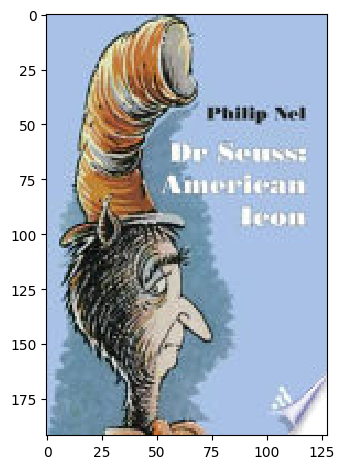

In [8]:
 book_sample(df_books.iloc[1,:])

In [11]:
# Create a function to see book reviews sample
def review_sample(row):
    print("##########################################")
    print('\t\t\t{}\t\t\n\n'.format(row['Title']))
    print("\n\n User_id is "+str(row['User_id']))
    print("\n\n profileName is " +str(row['profileName']))
    print("\n\n review/helpfulness is "+str(row['review/helpfulness']))
    print("\n\n review/score is "+str(row['review/score']))
    print("\n\n review/time is "+str(row['review/time']))
    print("\n\n review/summary is "+str(row['review/summary']))
    print("\n\n review/text are "+str(row['review/text']))
    print("##########################################")

In [12]:
review_sample(df_reviews.iloc[1,:])

##########################################
			Dr. Seuss: American Icon		




 User_id is A30TK6U7DNS82R


 profileName is Kevin Killian


 review/helpfulness is 10/10


 review/score is 5.0


 review/time is 1095724800


 review/summary is Really Enjoyed It


 review/text are I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they have there.There's almost too much to take in, for, like William Butler Yeats, Seuss led a career that constantly shifted and metamoprhized itself to meet new historical and political cirsumstances, so 

In [13]:
# Check dataset columns
print(df_books.columns)
print(df_reviews.columns)

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')
Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


In [14]:
# Check null data on datasets
print(df_reviews.isnull().sum())
print(df_books.isnull().sum())

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64
Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


<Axes: >

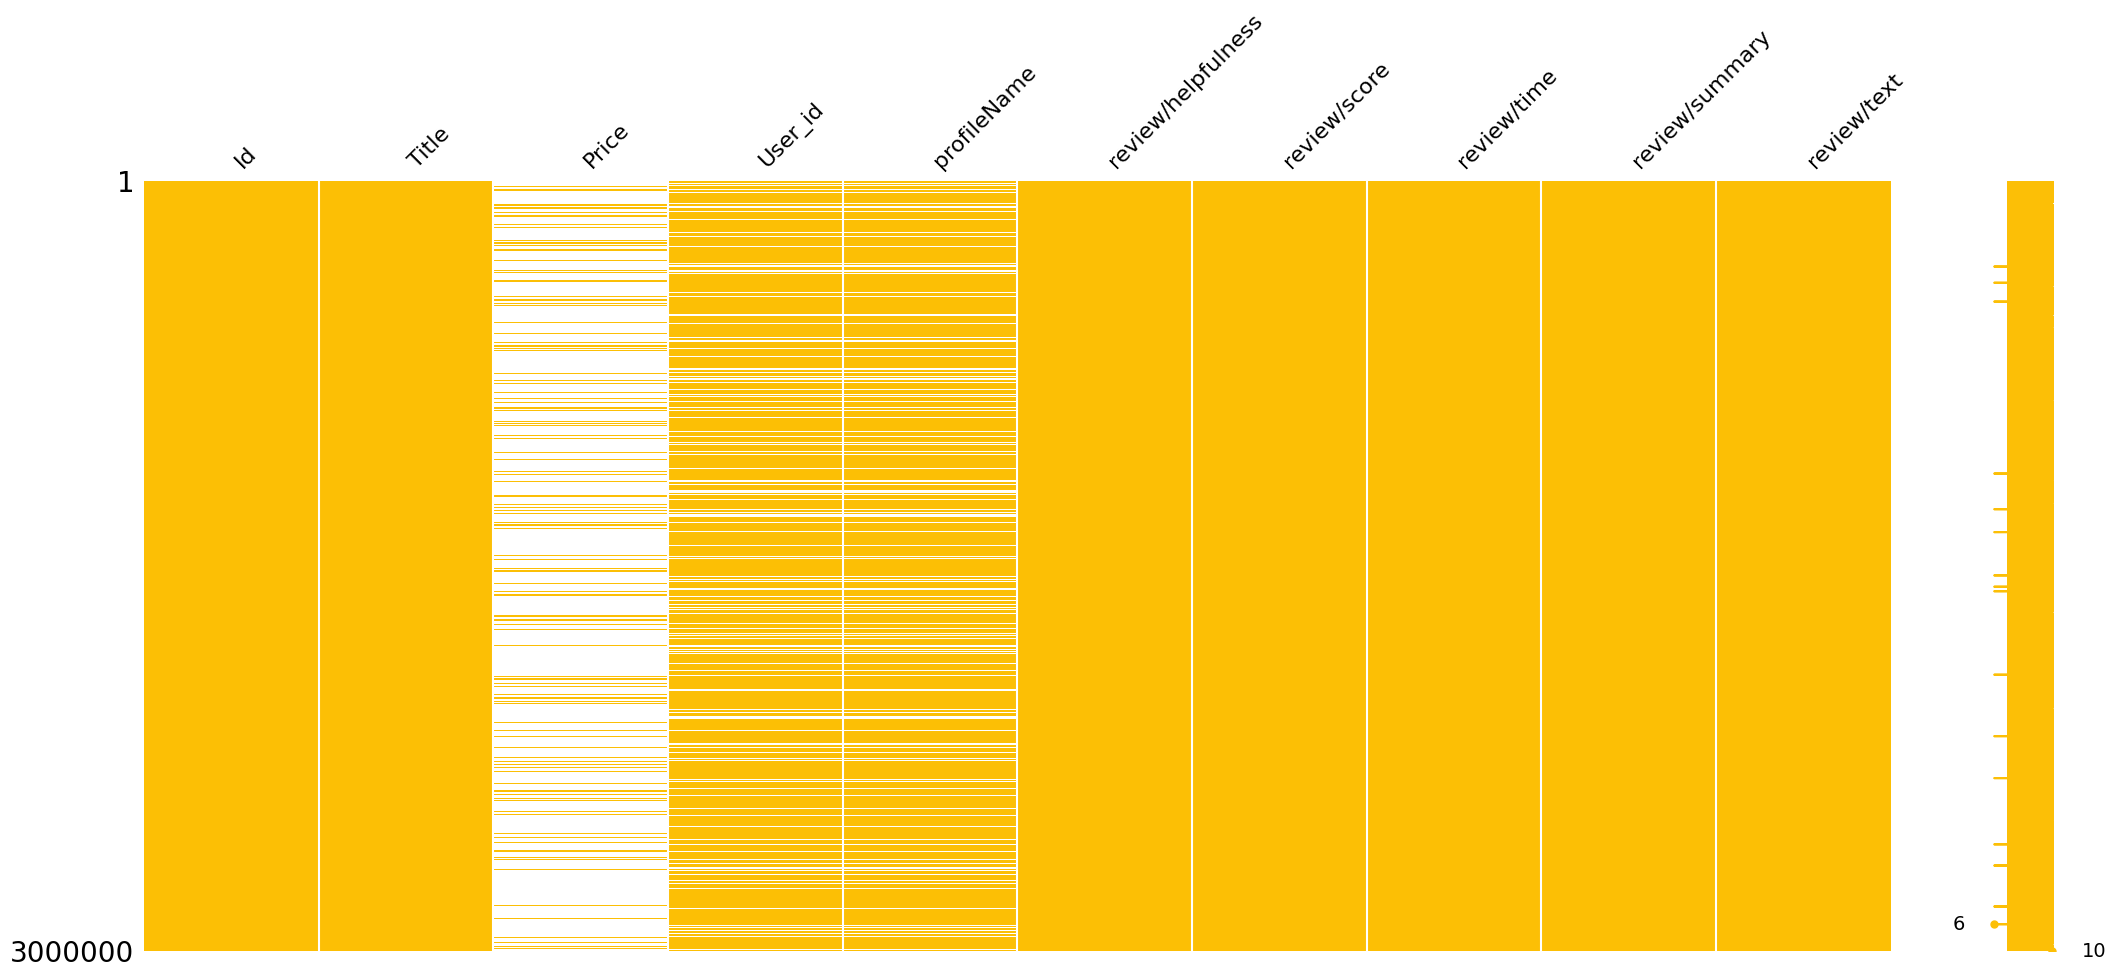

In [15]:
msno.matrix(df_reviews,color=(0.99, 0.75, 0.023))

<Axes: >

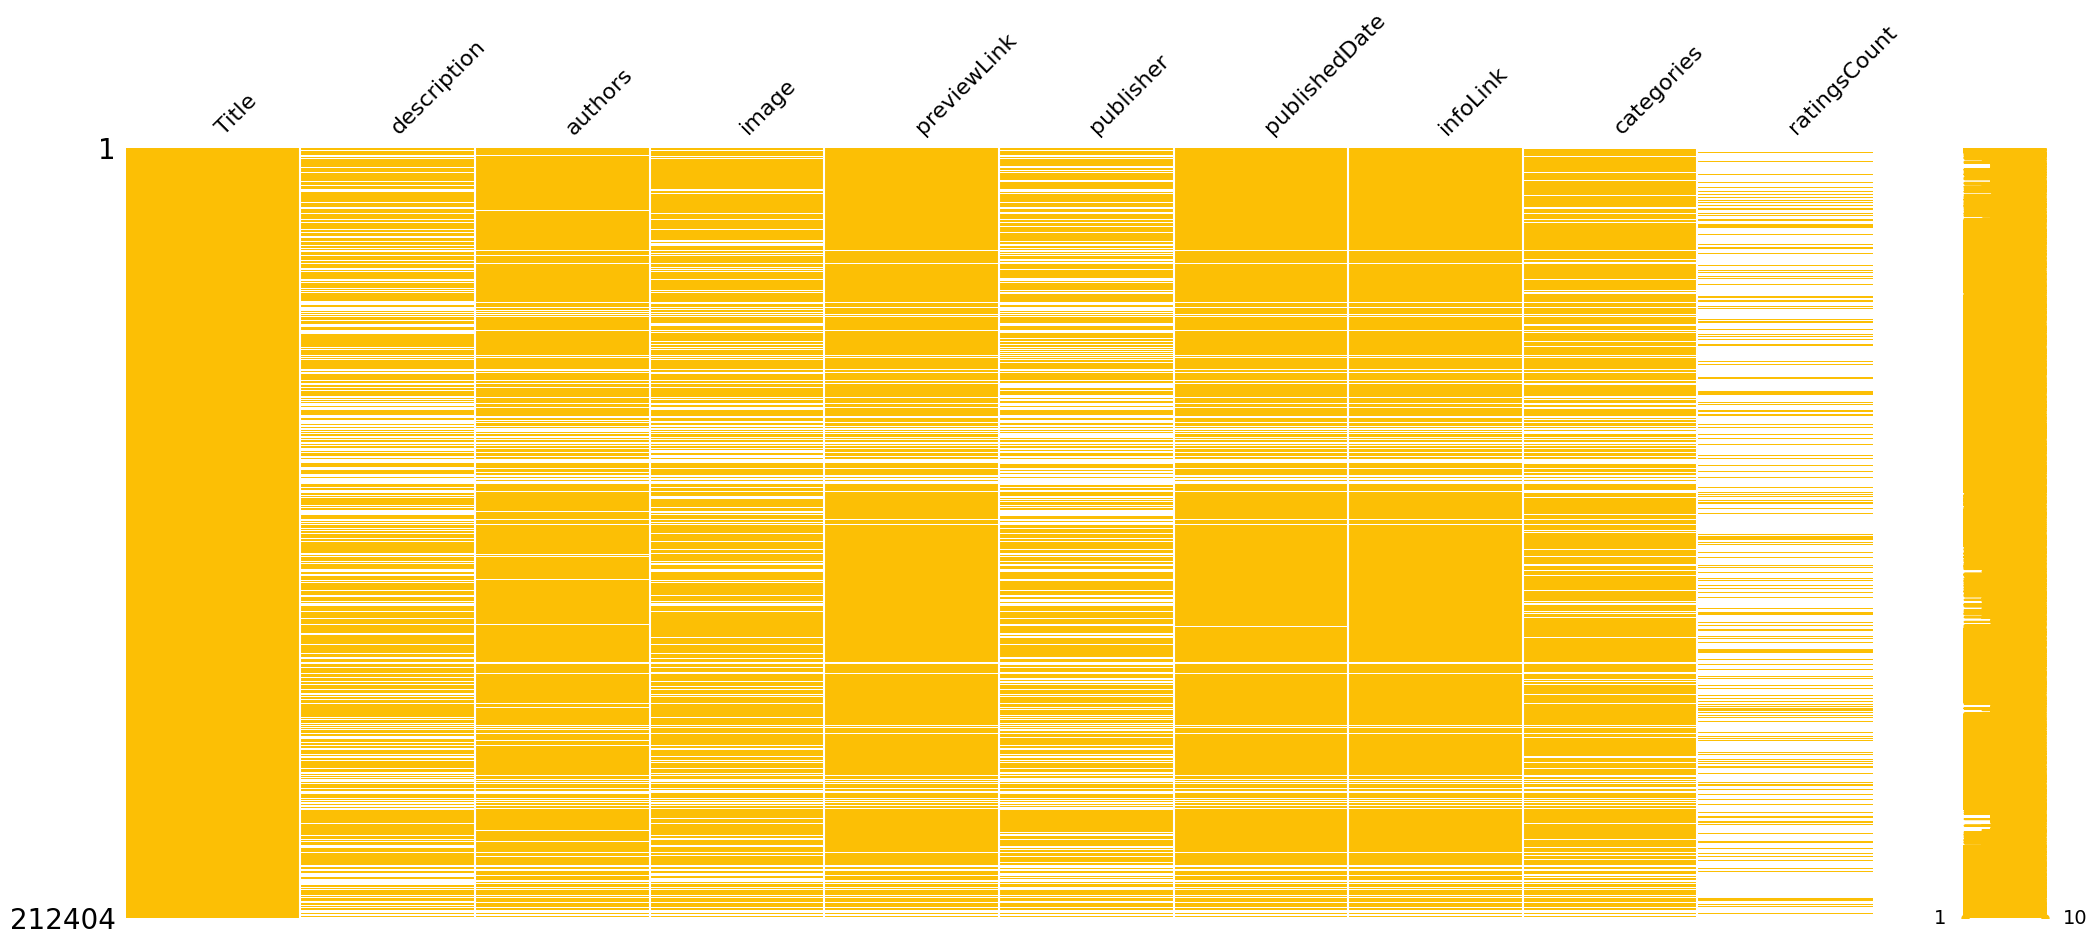

In [16]:
msno.matrix(df_books,color=(0.99, 0.75, 0.023))

In [17]:
# Compare classes size
# print(df_books['categories'].value_counts())
# print(df_books['publisher'].value_counts())
colors = ['gold', 'mediumturquoise','brown']
labels = df_reviews['review/score'].value_counts().keys().map(str)
values = df_reviews['review/score'].value_counts()/df_reviews['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.show()

In [18]:
# Browse the reviews from a book
groups=df_reviews.groupby('Title')
book_sample(df_books.iloc[4])
groups.get_group(df_books.loc[15,'Title'])

##########################################
			Nation Dance: Religion, Identity and Cultural Difference in the Caribbean		


description : nan


 authors are ['Edward Long']
can't read image maybe it's Null or don't have interent connection


 previewLink is 


'http://books.google.nl/books?id=399SPgAACAAJ&dq=Nation+Dance:+Religion,+Identity+and+Cultural+Difference+in+the+Caribbean&hl=&cd=1&source=gbs_api'



 infoLink is 


'http://books.google.nl/books?id=399SPgAACAAJ&dq=Nation+Dance:+Religion,+Identity+and+Cultural+Difference+in+the+Caribbean&hl=&source=gbs_api'



 publisher is nan


 published Date is 2003-03-01


 categories are nan


 rating is nan
##########################################


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
80,0908968000,Gold and greenstone,NaN,A3Q7EWPN8MK8MS,Rob,0/2,5.0,948585600,&quot;Gold and Greenstone&quot; Barry Crump,A great New Zealand book writen in the true Ba...


In [19]:
# Check total reviewers of the book
user_per_book=df_reviews.groupby('Title')['User_id'].count()
user_per_book=user_per_book.sort_values(ascending = False)
fig = px.bar(user_per_book.head(50))
fig.show()

In [21]:
# Get The Hobbit
book_sample(df_books[df_books['Title'] == user_per_book.keys()[0]])
df_hobbit = groups.get_group(user_per_book.keys()[0])

##########################################
			29057    The Hobbit
Name: Title, dtype: object		


description : 29057    Celebrating 75 years of one of the world's mos...
Name: description, dtype: object


 authors are 29057    ['J. R. R. Tolkien']
Name: authors, dtype: object
can't read image maybe it's Null or don't have interent connection


 previewLink is 


29057    http://books.google.com/books?id=LLSpngEACAAJ&...
Name: previewLink, dtype: object



 infoLink is 


29057    http://books.google.com/books?id=LLSpngEACAAJ&...
Name: infoLink, dtype: object



 publisher is 29057    Mariner Books
Name: publisher, dtype: object


 published Date is 29057    2012
Name: publishedDate, dtype: object


 categories are 29057    ['Juvenile Fiction']
Name: categories, dtype: object


 rating is 29057    2580.0
Name: ratingsCount, dtype: float64
##########################################


In [22]:
# Check the hobbit dataset
df_hobbit.shape

(22023, 10)

In [23]:
colors = ['gold', 'mediumturquoise','brown']
labels = df_hobbit['review/score'].value_counts().keys().map(str)
values = df_hobbit['review/score'].value_counts()/df_hobbit['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.show()

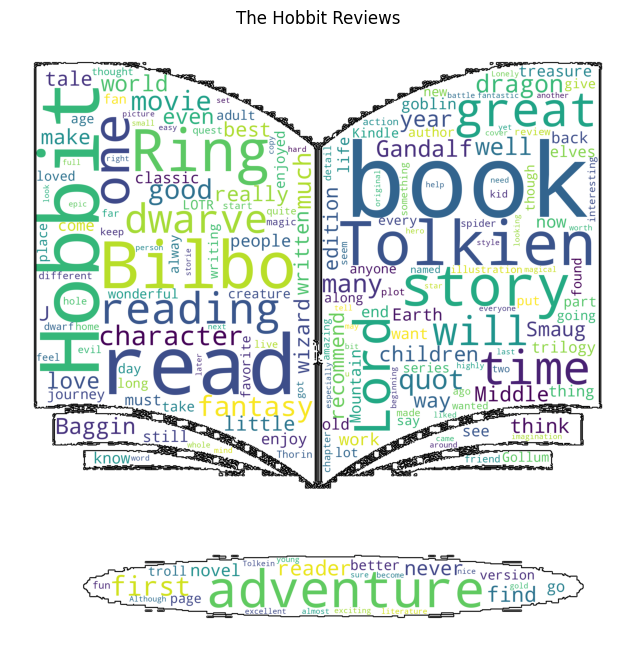

In [24]:
# Create wordcloud from the hobbit reviews
response = requests.get("https://thumbs.dreamstime.com/b/open-book-silhouette-black-white-open-book-silhouette-black-white-icon-illustration-isolated-background-117809208.jpg")
mask = np.array(Image.open(BytesIO(response.content)))
def generate_better_wordcloud(data, title, mask=None):

    cloud = WordCloud(scale=3,
                      max_words=200,

                      background_color="white",
                      mask=mask,
                      collocations = False,
                      contour_color='black',
                      contour_width=3).generate(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
generate_better_wordcloud(' '.join(df_hobbit['review/text']), 'The Hobbit Reviews', mask)